This will explore the previously parsed Zooniverse annotated data.

In [1]:
data_file = './zooniverse/cleaned_zooniverse.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(data_file)

In [4]:
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007


### Annotator 1

In [12]:
df_a1 = df[df['annotators']=='annotator1']

len(df_a1)

80

<Axes: xlabel='Ground Truth nGaussians', ylabel='Human nGaussians'>

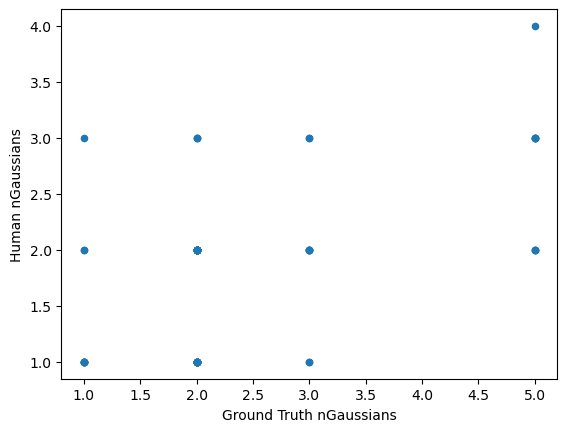

In [6]:
df_a1.plot(x='Ground Truth nGaussians', y='Human nGaussians', kind='scatter')

(-0.8, 0.9)

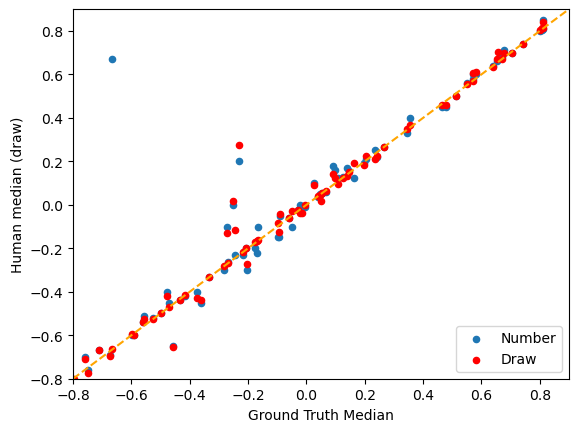

In [ ]:
ax = df_a1.plot(x='Ground Truth Median', y='Human median (number)', kind='scatter', label='Number')
df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', label='Draw', ax=ax, color='red')

# so we can compare
mxmin = -0.8
mxmax = 0.9

# draw line of what it should be
ax.plot([mxmin,mxmax],[mxmin,mxmax], color='orange', linestyle='--')

ax.set_ylim(mxmin,mxmax)
ax.set_xlim(mxmin,mxmax)

In [17]:
diff1 = (np.abs(df_a1['Ground Truth Median']-df_a1['Human median (draw)']))/np.abs(df_a1['Ground Truth Median'])

np.mean(diff1), np.std(diff1)

(np.float64(0.19298121815362174), 0.42507057171782764)

In [9]:
q1 = np.percentile(diff1, 25)
q3 = np.percentile(diff1, 75)

iqr = q3 - q1

np.median(diff1), iqr

(np.float64(0.0364671267337863), np.float64(0.11682488786479395))

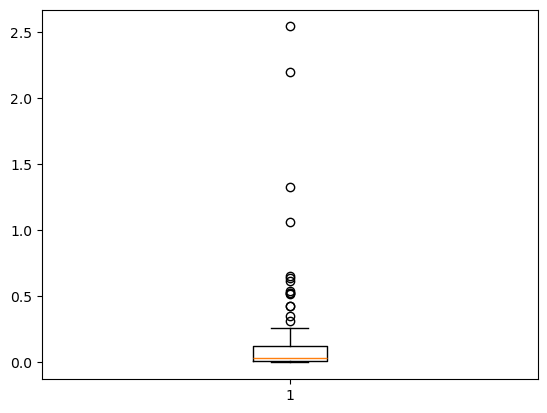

In [11]:
plt.boxplot(diff1)
plt.show()

### Annotator 2

In [13]:
df_a2 = df[df['annotators']=='annotator2']

len(df_a2)

80

<Axes: xlabel='Ground Truth nGaussians', ylabel='Human nGaussians'>

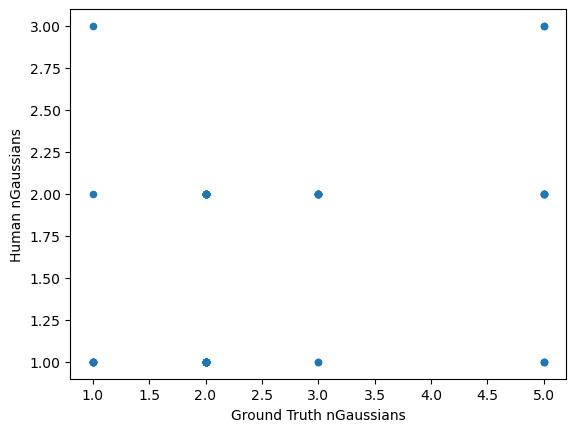

In [14]:
df_a2.plot(x='Ground Truth nGaussians', y='Human nGaussians', kind='scatter')

(-0.8, 0.9)

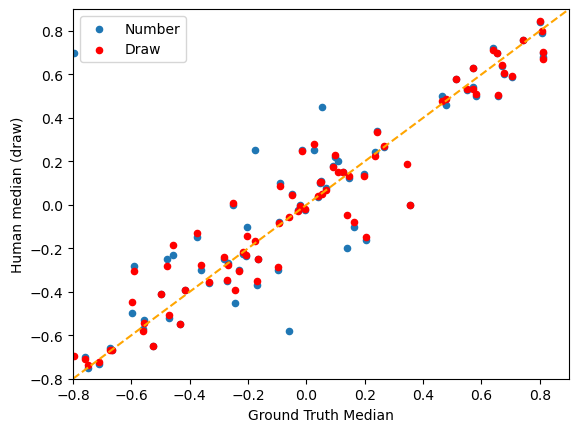

In [22]:
ax = df_a2.plot(x='Ground Truth Median', y='Human median (number)', kind='scatter', label='Number')
df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', label='Draw', ax=ax, color='red')

# so we can compare
mxmin = -0.8
mxmax = 0.9

ax.plot([mxmin,mxmax],[mxmin,mxmax], color='orange', linestyle='--')

ax.set_ylim(mxmin,mxmax)
ax.set_xlim(mxmin,mxmax)

In [18]:
diff2 = (np.abs(df_a2['Ground Truth Median']-df_a2['Human median (draw)']))/np.abs(df_a2['Ground Truth Median'])

np.mean(diff2), np.std(diff2)

(np.float64(0.7191192015889002), 2.132788369224864)

In [19]:
q1 = np.percentile(diff2, 25)
q3 = np.percentile(diff2, 75)

iqr2 = q3 - q1

np.median(diff2), iqr2

(np.float64(0.14713641903869362), np.float64(0.4655998981178578))

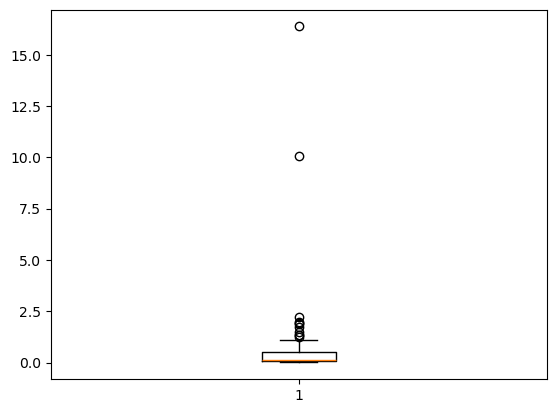

In [23]:
plt.boxplot(diff2)
plt.show()

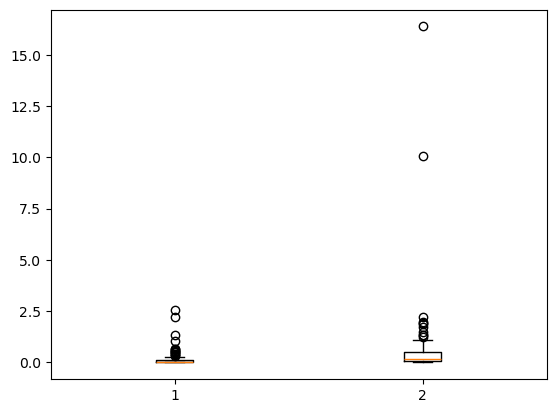

In [25]:
plt.boxplot([diff1,diff2])
plt.show()